In [ ]:
! pip install pickle5

In [ ]:
import re
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle5 as pickle
import scipy.sparse

#preprocessing and scoring
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score, recall_score, precision_score
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline

#models and algos
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

##customer pipeline function
from sklearn.base import BaseEstimator, TransformerMixin

#Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [ ]:
! pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"darshikasahu","key":"685f690c33b68f8099a8890b6e98e99f"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d "milobele/sentiment140-dataset-1600000-tweets"
!kaggle datasets download -d "slythe/apple-twitter-sentiment-crowdflower"
!kaggle datasets download -d "cosmos98/twitter-and-reddit-sentimental-analysis-dataset"

Dataset URL: https://www.kaggle.com/datasets/milobele/sentiment140-dataset-1600000-tweets
License(s): unknown
 96% 78.0M/81.0M [00:00<00:00, 148MB/s]
100% 81.0M/81.0M [00:00<00:00, 133MB/s]
Dataset URL: https://www.kaggle.com/datasets/slythe/apple-twitter-sentiment-crowdflower
License(s): unknown
  0% 0.00/203k [00:00<?, ?B/s]
100% 203k/203k [00:00<00:00, 62.5MB/s]
Dataset URL: https://www.kaggle.com/datasets/cosmos98/twitter-and-reddit-sentimental-analysis-dataset
License(s): CC-BY-NC-SA-4.0
 50% 5.00M/10.0M [00:00<00:00, 31.3MB/s]
100% 10.0M/10.0M [00:00<00:00, 55.1MB/s]


In [ ]:
!unzip sentiment140-dataset-1600000-tweets.zip -d ./sentiment-data/
!unzip twitter-and-reddit-sentimental-analysis-dataset.zip -d ./twitter-reddit-data/
!unzip apple-twitter-sentiment-crowdflower.zip -d ./apple-twitter-data/

Archive:  sentiment140-dataset-1600000-tweets.zip
  inflating: ./sentiment-data/testdata.manual.2009.06.14.csv  
  inflating: ./sentiment-data/training.1600000.processed.noemoticon.csv  
Archive:  twitter-and-reddit-sentimental-analysis-dataset.zip
  inflating: ./twitter-reddit-data/Reddit_Data.csv  
  inflating: ./twitter-reddit-data/Twitter_Data.csv  
Archive:  apple-twitter-sentiment-crowdflower.zip
  inflating: ./apple-twitter-data/Apple-Twitter-Sentiment-DFE.csv  


In [ ]:
train_sentiment_data = pd.read_csv("sentiment-data/training.1600000.processed.noemoticon.csv",encoding="Latin-1" ,names=["polarity","id", "date","query", "user", "tweet"])
test_sentiment_data  = pd.read_csv("sentiment-data/testdata.manual.2009.06.14.csv",encoding="Latin-1" ,names=["polarity","id", "date","query", "user", "tweet"])
apple = pd.read_csv("apple-twitter-data/Apple-Twitter-Sentiment-DFE.csv", encoding="Latin-1")
twitter_data = pd.read_csv("twitter-reddit-data/Twitter_Data.csv")

In [ ]:
train_sentiment_data = train_sentiment_data[["polarity", "tweet"]]
test_sentiment_data = test_sentiment_data[["polarity", "tweet"]]
apple = apple[["sentiment","text"]]
twitter_data = twitter_data[["category", "clean_text"]]

In [ ]:
apple.columns = ["polarity","tweet"]
test_sentiment_data.columns = ["polarity","tweet"]
twitter_data.columns = ["polarity","tweet"]

In [ ]:
#Replace values to have -1 negative, 0 neutral, 1 postive
train_sentiment_data["polarity"]  = train_sentiment_data["polarity"].replace(4,1)
train_sentiment_data["polarity"]  = train_sentiment_data["polarity"].replace(0,-1)

test_sentiment_data["polarity"]  = test_sentiment_data["polarity"].replace(4,1)
test_sentiment_data["polarity"]  = test_sentiment_data["polarity"].replace(0,-1)
test_sentiment_data["polarity"]  = test_sentiment_data["polarity"].replace(2,0)

apple["polarity"] = apple["polarity"].replace("1",-1)
apple["polarity"] = apple["polarity"].replace("3",0)
apple["polarity"] = apple["polarity"].replace("5",1)

<ipython-input-15-c41d27117d1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sentiment_data["polarity"]  = train_sentiment_data["polarity"].replace(4,1)
<ipython-input-15-c41d27117d1e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sentiment_data["polarity"]  = train_sentiment_data["polarity"].replace(0,-1)
<ipython-input-15-c41d27117d1e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [ ]:
apple = apple[apple["polarity"]!= "not_relevant"]
apple["polarity"] = apple["polarity"].astype(int)

<ipython-input-16-7e559fac3503>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple["polarity"] = apple["polarity"].astype(int)


In [ ]:
twitter_data.dropna(inplace= True)

In [ ]:
print("Sentiment_train_data_len: ", len(train_sentiment_data))
print("Sentiment_test_data_len: ", len(test_sentiment_data))
print("apple_data_len: ", len(apple))
print("twitter_data_len: ", len(twitter_data))

Sentiment_train_data_len:  1600000
Sentiment_test_data_len:  498
apple_data_len:  3804
twitter_data_len:  162969


In [ ]:
tweets_df = pd.concat([train_sentiment_data,test_sentiment_data,apple,twitter_data],axis=0)

In [ ]:
tweets_df.head()

,polarity,tweet
0,-1.0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,-1.0,is upset that he can't update his Facebook by ...
2,-1.0,@Kenichan I dived many times for the ball. Man...
3,-1.0,my whole body feels itchy and like its on fire
4,-1.0,"@nationwideclass no, it's not behaving at all...."


<Axes: xlabel='polarity', ylabel='count'>

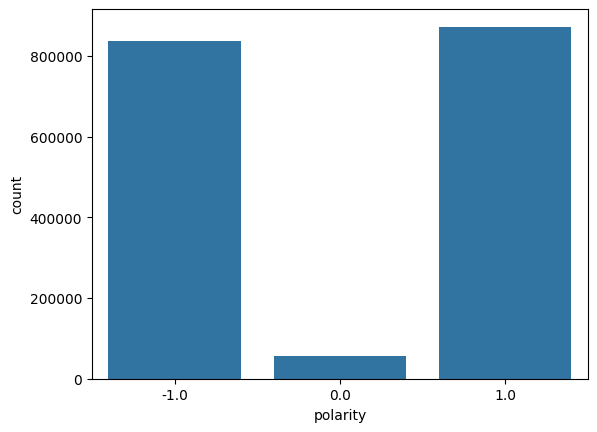

In [ ]:
sns.countplot(data = tweets_df , x = "polarity")

Due to the sentiment140 training data not including neutral tweets we have a imbalanced dataset

In [ ]:
tweets_df["tweet"] = tweets_df["tweet"].astype(str)
tweets_df.reset_index(drop = True,inplace=True)

In [ ]:
# Length
tweets_df["length"] = tweets_df["tweet"].apply(len)

In [ ]:
tweets_df.groupby("polarity")["length"].describe()

,count,mean,std,min,25%,50%,75%,max
polarity,,,,,,,,
-1.0,836905.0,77.457434,41.090448,5.0,45.0,71.0,108.0,359.0
0.0,57512.0,88.896630,56.370426,1.0,46.0,75.0,119.0,267.0
1.0,872854.0,79.365699,43.492193,4.0,45.0,72.0,109.0,374.0


<Figure size 1500x500 with 0 Axes>

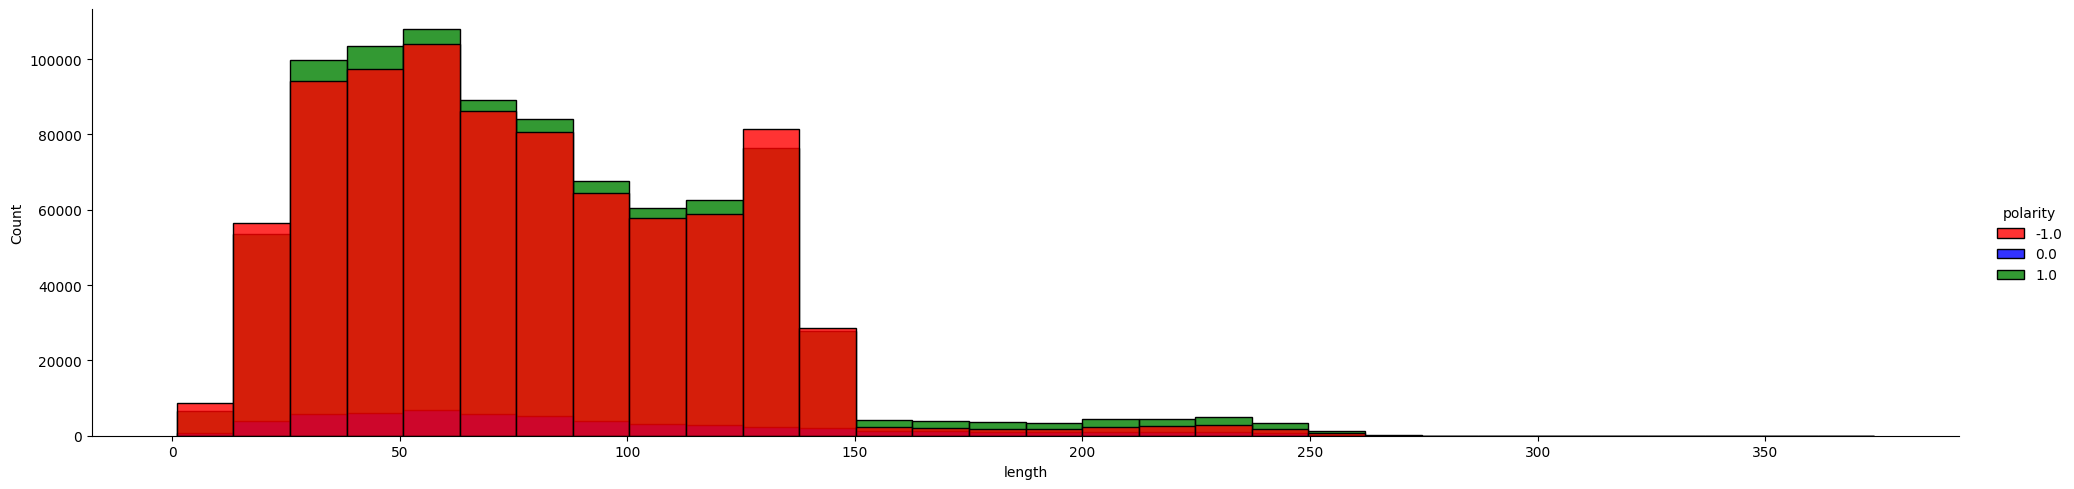

In [ ]:
plt.figure(figsize=(15,5))

sns.displot(data = tweets_df, x= "length", hue= "polarity" ,palette={-1:"r", 0:"b",1:"g"}, bins = 30,aspect= 4, alpha = 0.8)

**Data Cleaning**

In [ ]:
def clean_text(text):
    pat1 = r'@[^ ]+'                   #param
    pat2 = r'https?://[A-Za-z0-9./]+'  #links
    pat3 = r'\'s'                      #floating s's
    pat4 = r'\#\w+'                     # hashtags and value
    pat5 = r'&amp '
    pat6 = r'[^A-Za-z\s]'         #remove non-alphabet
    combined_pat = r'|'.join((pat1, pat2,pat3,pat4,pat5, pat6))
    text = re.sub(combined_pat,"",text).lower()
    return text.strip()

In [ ]:
#cleaned dataframe
tweets_df["cleaned_tweet"] = tweets_df["tweet"].apply(clean_text)

In [ ]:
tweets_df.head()

,polarity,tweet,length,cleaned_tweet
0,-1.0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,awww that a bummer you shoulda got david carr...
1,-1.0,is upset that he can't update his Facebook by ...,111,is upset that he cant update his facebook by t...
2,-1.0,@Kenichan I dived many times for the ball. Man...,89,i dived many times for the ball managed to sav...
3,-1.0,my whole body feels itchy and like its on fire,47,my whole body feels itchy and like its on fire
4,-1.0,"@nationwideclass no, it's not behaving at all....",111,no it not behaving at all im mad why am i here...


In [ ]:
#drop empty column
tweets_df = tweets_df [ ~(tweets_df["cleaned_tweet"] =="")]

**Lemmetization**

In [ ]:
word_lem = WordNetLemmatizer()

def tokenize_lem(sentence):
    outlist= []
    tokens = sentence.split()
    for token in tokens:
        outlist.append(word_lem.lemmatize(token))
    return " ".join(outlist)

In [ ]:
tweets_df["cleaned_tweet"] = tweets_df["cleaned_tweet"].apply(tokenize_lem)

<ipython-input-34-d776f8662c37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df["cleaned_tweet"] = tweets_df["cleaned_tweet"].apply(tokenize_lem)


In [ ]:
tweets_df.head()

,polarity,tweet,length,cleaned_tweet
0,-1.0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,awww that a bummer you shoulda got david carr ...
1,-1.0,is upset that he can't update his Facebook by ...,111,is upset that he cant update his facebook by t...
2,-1.0,@Kenichan I dived many times for the ball. Man...,89,i dived many time for the ball managed to save...
3,-1.0,my whole body feels itchy and like its on fire,47,my whole body feel itchy and like it on fire
4,-1.0,"@nationwideclass no, it's not behaving at all....",111,no it not behaving at all im mad why am i here...


In [ ]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1763318 entries, 0 to 1767270
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   polarity       float64
 1   tweet          object 
 2   length         int64  
 3   cleaned_tweet  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 67.3+ MB


In [ ]:
tweets_df.shape

(1763318, 4)

**split the data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tweets_df[["cleaned_tweet", "length"]], tweets_df['polarity'], test_size=0.1, random_state=42)

**TF-IDF -> vectorise the tweets**

In [ ]:
tf_idf = TfidfVectorizer()
tf_idf.fit(X_train["cleaned_tweet"])

X_train_v = tf_idf.transform(X_train["cleaned_tweet"])
X_test_v = tf_idf.transform(X_test["cleaned_tweet"])

In [ ]:
print("X_train_v_shape: ", X_train_v.shape)
print("X_test_v_shape: ", X_test_v.shape)

X_train_v_shape:  (1586986, 432682)
X_test_v_shape:  (176332, 432682)


**Add TFIDF to tweets vector and scaling**

In [ ]:
scaler = MinMaxScaler()
scaler2 = MinMaxScaler()

In [ ]:
scaler.fit([X_train['length']])
scaler2.fit([X_test['length']])

MinMaxScaler()

In [ ]:
X_train_len = scaler.transform([X_train["length"]])
X_train_len = X_train_len.reshape( X_train_v.shape[0], 1)

X_train = scipy.sparse.hstack([X_train_v,X_train_len], format = "csr")

In [ ]:
X_test_len = scaler2.transform([X_test["length"]])
X_test_len = X_test_len.reshape(X_test_v.shape[0], 1)

X_test = scipy.sparse.hstack([X_test_v,X_test_len], format = "csr")

**Algorithms used:
Random Forest
LinearSVC
Naive Bayes (Bernoulini and Multinomial)
XGBoost
Logistic Regression
Ridge

Out-the-box models for comparison:
Textblob
Vader**

GridSearchCV

Due to the time some of these models took to run, the tuning for the below models were was done outside Kaggle and as a result some parameter iterations were reduced:

In [ ]:
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [ ]:
model_score = pd.DataFrame(columns=["model_f1_train","params_used", "f1","precision","recall"])

def model_prediction(model, params):

    model = GridSearchCV(model, param_grid= params, cv= kfold)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print ("Model and params: ", model.best_estimator_, model.best_params_)
    print("\n")
    print("Train score: ", model.best_score_)
    print("test score: ",accuracy_score(y_test,y_pred))
    print("\n")
    print("Test Report:")
    print(classification_report(y_test,y_pred))
    return y_pred, model


In [ ]:
def model_scoring(y_pred, model):
    global y_test
    global model_score

    # Create a DataFrame for the new data
    df = pd.DataFrame(
        data=[[model.best_score_,
               model.best_params_,
               f1_score(y_test, y_pred, average="macro"),
               precision_score(y_test, y_pred, average="macro"),
               recall_score(y_test, y_pred, average="macro")]],
        columns=model_score.columns,
        index=[str(model.best_estimator_)]
    )

    # Use pd.concat instead of append
    model_score = pd.concat([model_score, df])

In [ ]:
#Set Parameters
gen_params = {"alpha":[1,3]}
xgb_params = {
        'n_estimators': [200],
        'max_depth': [9],
        'eta': [0.5],
}
lnSVC_params = {
    "C": [1]
}
logr_params = {
    "penalty": ["l2"],
    "C": [5],
    "max_iter": [10000]
}
forest_params = {
    "n_estimators": [100],
    "max_depth" : [8]
}

In [ ]:
#Instantiate
vader = SentimentIntensityAnalyzer()
#textblob does not required instantiation

logr_i = LogisticRegression(solver="sag")
ridge_i = RidgeClassifier()                 # L2 regularization
lnSVC_i = LinearSVC()
naivemulti_i = MultinomialNB()
naivebern_i = BernoulliNB()
xgb_i = XGBClassifier(#tree_method='gpu_hist'
                     )
rf_i = RandomForestClassifier()

**Due to the time take to run the below models (+9hrs) I have excluded all except random forest

Note thet XGBoost has the highest accruacy and f1 score of all the models used**

In [ ]:
log_pred , logr_m = model_prediction(logr_i, logr_params)
# ridge_pred, ridge_m = model_prediction(ridge_i,{"alpha":[3]})
# linSVC_pred, lnSVC_m = model_prediction(lnSVC_i, lnSVC_params)
# naivemulti_pred, naivemulti_m = model_prediction(naivemulti_i, gen_params)
# naivebern_pred, naivebern_m = model_prediction(naivebern_i, gen_params)
#xgb_pred, xgb_m = model_prediction(xgb_i, xgb_params)
#rf_pred, rf_m = model_prediction(rf_i,forest_params)

Model and params:  LogisticRegression(C=5, max_iter=10000, solver='sag') {'C': 5, 'max_iter': 10000, 'penalty': 'l2'}


Train score:  0.7885929677994562
test score:  0.7890910328244448


Test Report:
              precision    recall  f1-score   support

        -1.0       0.79      0.77      0.78     83203
         0.0       0.87      0.83      0.85      5704
         1.0       0.79      0.80      0.79     87425

    accuracy                           0.79    176332
   macro avg       0.81      0.80      0.81    176332
weighted avg       0.79      0.79      0.79    176332



In [ ]:
ridge_pred, ridge_m = model_prediction(ridge_i,{"alpha":[3]})

Model and params:  RidgeClassifier(alpha=3) {'alpha': 3}


Train score:  0.7760440228936358
test score:  0.7763707097974276


Test Report:
              precision    recall  f1-score   support

        -1.0       0.79      0.77      0.78     83203
         0.0       0.67      0.47      0.55      5704
         1.0       0.77      0.80      0.79     87425

    accuracy                           0.78    176332
   macro avg       0.74      0.68      0.71    176332
weighted avg       0.78      0.78      0.78    176332



In [ ]:
linSVC_pred, lnSVC_m = model_prediction(lnSVC_i, lnSVC_params)

Model and params:  LinearSVC(C=1) {'C': 1}


Train score:  0.7856490226144788
test score:  0.786130707982669


Test Report:
              precision    recall  f1-score   support

        -1.0       0.79      0.77      0.78     83203
         0.0       0.86      0.77      0.81      5704
         1.0       0.78      0.80      0.79     87425

    accuracy                           0.79    176332
   macro avg       0.81      0.78      0.79    176332
weighted avg       0.79      0.79      0.79    176332



In [ ]:
naivemulti_pred, naivemulti_m = model_prediction(naivemulti_i, gen_params)

Model and params:  MultinomialNB(alpha=3) {'alpha': 3}


Train score:  0.7459895675735686
test score:  0.7448789782909512


Test Report:
              precision    recall  f1-score   support

        -1.0       0.76      0.77      0.76     83203
         0.0       1.00      0.00      0.00      5704
         1.0       0.73      0.77      0.75     87425

    accuracy                           0.74    176332
   macro avg       0.83      0.51      0.51    176332
weighted avg       0.75      0.74      0.73    176332



In [ ]:
naivebern_pred, naivebern_m = model_prediction(naivebern_i, gen_params)

Model and params:  BernoulliNB(alpha=3) {'alpha': 3}


Train score:  0.7478862450064254
test score:  0.7464725631195699


Test Report:
              precision    recall  f1-score   support

        -1.0       0.76      0.77      0.77     83203
         0.0       0.32      0.10      0.15      5704
         1.0       0.74      0.76      0.75     87425

    accuracy                           0.75    176332
   macro avg       0.61      0.55      0.56    176332
weighted avg       0.74      0.75      0.74    176332



In [ ]:
model_scoring(log_pred, logr_m)
model_scoring(ridge_pred, ridge_m)
model_scoring(linSVC_pred, lnSVC_m)
model_scoring(naivemulti_pred, naivemulti_m)
model_scoring(naivebern_pred, naivebern_m)

<ipython-input-57-119899f423ff>:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_score = pd.concat([model_score, df])


In [ ]:
model_score

,model_f1_train,params_used,f1,precision,recall
"LogisticRegression(C=5, max_iter=10000, solver='sag')",0.788593,"{'C': 5, 'max_iter': 10000, 'penalty': 'l2'}",0.807945,0.814080,0.802175
RidgeClassifier(alpha=3),0.776044,{'alpha': 3},0.705484,0.744142,0.679713
LinearSVC(C=1),0.785649,{'C': 1},0.794699,0.809403,0.781662
MultinomialNB(alpha=3),0.745990,{'alpha': 3},0.506123,0.830318,0.513723
BernoulliNB(alpha=3),0.747886,{'alpha': 3},0.557650,0.606396,0.545954


Out-the box models

Textblob, Vader

In [ ]:
def out_box_textblob(x):
    x = TextBlob(x).sentiment[0]
    if x >0:
        x = 1
    elif x<0:
        x = -1
    else:
        x= 0
    return x

In [ ]:
def out_box_vader(x):
    x = vader.polarity_scores(x)["compound"]
    if x >0:
        x = 1
    elif x<0:
        x = -1
    else:
        x= 0
    return x

In [ ]:
def out_box_score(y_true, prediction, name):
    global model_score

    # Create a DataFrame for the new data
    df = pd.DataFrame(
        data=[[0,
               0,
               f1_score(y_true, prediction, average="macro"),
               precision_score(y_true, prediction, average="macro"),
               recall_score(y_true, prediction, average="macro")]],
        columns=model_score.columns,
        index=[name]
    )

    model_score = pd.concat([model_score, df])

In [ ]:
textblob_pred = tweets_df["cleaned_tweet"].apply(out_box_textblob)
vader_pred = tweets_df["cleaned_tweet"].apply(out_box_vader)

out_box_score(tweets_df["polarity"],vader_pred, "Vader")
out_box_score(tweets_df["polarity"],textblob_pred,"Textblob")

In [ ]:
model_score

,model_f1_train,params_used,f1,precision,recall
"LogisticRegression(C=5, max_iter=10000, solver='sag')",0.788593,"{'C': 5, 'max_iter': 10000, 'penalty': 'l2'}",0.807945,0.814080,0.802175
RidgeClassifier(alpha=3),0.776044,{'alpha': 3},0.705484,0.744142,0.679713
LinearSVC(C=1),0.785649,{'C': 1},0.794699,0.809403,0.781662
MultinomialNB(alpha=3),0.745990,{'alpha': 3},0.506123,0.830318,0.513723
BernoulliNB(alpha=3),0.747886,{'alpha': 3},0.557650,0.606396,0.545954
Vader,0.000000,0,0.428977,0.486201,0.483831
Textblob,0.000000,0,0.423028,0.509440,0.632382


**Save all models & vocab**

In [ ]:
model_dict = {
    logr_m : "logr_m",
    ridge_m:"ridge_m",lnSVC_m:"lnSVC_m", naivemulti_m:"naivemulti_m", naivebern_m:"naivebern_m"
             }
for m in model_dict.items():
    file = open(f'{m[1]}.pickle','wb')
    pickle.dump(m[0], file)
    file.close()

In [ ]:
## save vocabulary
with open("vocabulary","wb") as f:
    pickle.dump(tf_idf.vocabulary_,f)
    f.close()

**Pipeline**

In [ ]:
# Assuming tweets_df is already defined and contains 'cleaned_tweet' and 'polarity'
X = tweets_df["cleaned_tweet"]
y = tweets_df["polarity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Define the pipeline
pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Convert text to TF-IDF features
    ('classifier', MultinomialNB())  # Use Naive Bayes as the classifier
])

In [ ]:
! pip install xgboost

In [ ]:
# Fit the model
pipe.fit(X, y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', MultinomialNB())])

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

        -1.0       0.80      0.80      0.80    250302
         0.0       0.81      0.11      0.19     17018
         1.0       0.77      0.81      0.79    261676

    accuracy                           0.78    528996
   macro avg       0.79      0.57      0.59    528996
weighted avg       0.78      0.78      0.77    528996

